# Homework 1

**Yiğit Berk SARIBOĞA**

In [4]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
from numpy import ndarray, arange
from collections import Counter
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import csv
from zipfile import ZipFile
from urllib.request import urlopen
import shutil
import os
import gzip
from io import BytesIO
from scipy.stats import ttest_rel, chisquare

# Question 1

For this question use the data at this [link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

**Step 1:** Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.

**Step 2:** Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.

**Step 3:** Plot the results for step #1 and #2.

**Step 4:** Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020

**Step 5:** Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?

## Answers

In [ ]:
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv') as a:
    rawJan2021 = pd.read_csv(a)  
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv') as b:
    rawMay2021 = pd.read_csv(b)    
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv') as c:
    rawApr2020 = pd.read_csv(c) 
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv') as d:
    rawJun2020 = pd.read_csv(d) 
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv') as e:
    rawSep2020 = pd.read_csv(e)  
with urlopen('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/a195a42f-727a-4f1e-ad55-471306788c99/download/hourly_transportation_202008.csv') as f:
    rawAug2020 = pd.read_csv(f)

### Step 1

In [3]:
rawJan2021

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-01-11 11:00:00,2,RAY,KABATAŞ-MAHMUTBEY,2,AKTARMA,541,545
1,2021-01-18 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,1834,1867
2,2021-01-01 17:00:00,1,KARAYOLU,İETT,2,NORMAL,7406,7868
3,2021-01-18 20:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,7064,7199
4,2021-01-22 05:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,712,713
...,...,...,...,...,...,...,...,...
22122,2021-01-19 21:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1445,1447
22123,2021-01-15 22:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,122,123
22124,2021-01-08 15:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,3641,3720
22125,2021-01-08 10:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,7380,7857


In [4]:
rawMay2021

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-05-01 14:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,88,88
1,2021-05-03 16:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,5311,5356
2,2021-05-01 06:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,129,129
3,2021-05-03 12:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2574,2641
4,2021-05-03 07:00:00,2.0,RAY,TAKSİM-4.LEVENT,2,AKTARMA,1038,1038
...,...,...,...,...,...,...,...,...
1785,2021-05-02 15:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,134,134
1786,2021-05-03 09:00:00,2.0,RAY,İETT TÜNEL,2,AKTARMA,29,29
1787,2021-05-02 09:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,109,111
1788,2021-05-02 23:00:00,2.0,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,2,2


In [3]:
grouped_a = rawJan2021.groupby(rawJan2021.TRANSPORT_TYPE_DESC)
rawJan2021_karayolları = grouped_a.get_group("KARAYOLU")

grouped_a = rawJan2021.groupby(rawJan2021.TRANSPORT_TYPE_DESC)
rawJan2021_deniz = grouped_a.get_group("DENİZ")

grouped_a = rawJan2021.groupby(rawJan2021.TRANSPORT_TYPE_DESC)
rawJan2021_ray = grouped_a.get_group("RAY")

In [4]:
rawJan2021_karayolları

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
1,2021-01-18 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,1834,1867
2,2021-01-01 17:00:00,1,KARAYOLU,İETT,2,NORMAL,7406,7868
3,2021-01-18 20:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,7064,7199
6,2021-01-13 18:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,9114,9257
14,2021-01-01 13:00:00,1,KARAYOLU,İETT,2,NORMAL,1513,1689
...,...,...,...,...,...,...,...,...
22004,2021-01-31 13:00:00,1,KARAYOLU,METROBÜS,2,NORMAL,3578,3623
22017,2021-01-31 23:00:00,1,KARAYOLU,METROBÜS,2,NORMAL,922,927
22077,2021-01-31 17:00:00,1,KARAYOLU,METROBÜS,2,NORMAL,5839,5887
22079,2021-01-31 22:00:00,1,KARAYOLU,METROBÜS,2,NORMAL,1428,1435


In [6]:
grouped_b = rawMay2021.groupby(rawMay2021.TRANSPORT_TYPE_DESC)
rawMay2021_karayolları = grouped_b.get_group("KARAYOLU")

grouped_b = rawMay2021.groupby(rawMay2021.TRANSPORT_TYPE_DESC)
rawMay2021_deniz = grouped_b.get_group("DENİZ")

grouped_b = rawMay2021.groupby(rawMay2021.TRANSPORT_TYPE_DESC)
rawMay2021_ray = grouped_b.get_group("RAY")

In [7]:
total_usage_karayolu_a = rawJan2021_karayolları['NUMBER_OF_PASSENGER'].sum()
total_usage_deniz_a = rawJan2021_deniz['NUMBER_OF_PASSENGER'].sum()
total_usage_ray_a = rawJan2021_ray['NUMBER_OF_PASSENGER'].sum()
total_usage_karayolu_b = rawMay2021_karayolları['NUMBER_OF_PASSENGER'].sum()
total_usage_deniz_b = rawMay2021_deniz['NUMBER_OF_PASSENGER'].sum()
total_usage_ray_b = rawMay2021_ray['NUMBER_OF_PASSENGER'].sum()

In [8]:
data = [{'KARAYOLU': total_usage_karayolu_a, 'RAY': total_usage_ray_a, 'DENİZ': total_usage_deniz_a}, {'KARAYOLU': total_usage_karayolu_b, 'RAY': total_usage_ray_b, 'DENİZ': total_usage_deniz_b}]
df = pd.DataFrame(data, columns=['KARAYOLU', 'RAY', 'DENİZ'], index=['January 2021', 'May 2021'])
df

,KARAYOLU,RAY,DENİZ
January 2021,44635332,27951380,1763773
May 2021,1823757,773797,47448


There is a significant reduction in the use of all three lines in May.

### Step 2

In [9]:
grouped_aktarma_Jun = rawJun2020.groupby(rawJun2020.TRANSFER_TYPE)
rawJun2020_aktarma = grouped_aktarma_Jun.get_group("AKTARMA")
total_usage_aktarma_Jun = rawJun2020_aktarma['NUMBER_OF_PASSENGER'].sum()
rawJun2020_aktarma

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
2,2020-06-23 05:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,14,14
3,2020-06-28 11:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,51,51
8,2020-06-27 21:00:00,2,RAY,MARMARAY,2,AKTARMA,1698,1704
11,2020-06-03 06:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,563,564
13,2020-06-22 23:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,342,344
...,...,...,...,...,...,...,...,...
19829,2020-06-24 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,62,63
19830,2020-06-22 08:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,138,138
19831,2020-06-12 10:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,3430,3529
19832,2020-06-29 12:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,103,106


In [10]:
grouped_normal_Jun = rawJun2020.groupby(rawJun2020.TRANSFER_TYPE)
rawJun2020_normal = grouped_normal_Jun.get_group("NORMAL")
total_usage_normal_Jun = rawJun2020_normal['NUMBER_OF_PASSENGER'].sum()
rawJun2020_normal

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-06-07 08:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,1829,1925
1,2020-06-07 22:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2669,3110
4,2020-06-26 18:00:00,2,RAY,MARMARAY,2,NORMAL,19160,19794
5,2020-06-03 00:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,61,69
6,2020-06-27 22:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,2323,2531
...,...,...,...,...,...,...,...,...
19821,2020-06-22 15:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,169,173
19822,2020-06-11 14:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,8353,9219
19823,2020-06-11 15:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,8551,9360
19826,2020-06-30 07:00:00,2,RAY,MARMARAY,2,NORMAL,14003,14139


In [11]:
grouped_aktarma_Sep = rawSep2020.groupby(rawSep2020.TRANSFER_TYPE)
rawSep2020_aktarma = grouped_aktarma_Sep.get_group("AKTARMA")
total_usage_aktarma_Sep = rawSep2020_aktarma['NUMBER_OF_PASSENGER'].sum()
rawSep2020_aktarma

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910
4,2020-09-26 13:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,3348,3379
10,2020-09-02 21:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,5780,5977
15,2020-09-12 08:00:00,2,RAY,KADIKÖY-MODA,2,AKTARMA,4,4
16,2020-09-26 21:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,1561,1573
...,...,...,...,...,...,...,...,...
22183,2020-09-15 14:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,1622,1641
22184,2020-09-28 12:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,1146,1147
22185,2020-09-29 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,17,17
22186,2020-09-08 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,130,131


In [12]:
grouped_normal_Sep = rawSep2020.groupby(rawSep2020.TRANSFER_TYPE)
rawSep2020_normal = grouped_normal_Sep.get_group("NORMAL")
total_usage_normal_Sep = rawSep2020_normal['NUMBER_OF_PASSENGER'].sum()
rawSep2020_normal

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
1,2020-09-16 09:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,12,15
2,2020-09-15 12:00:00,2,RAY,KADIKÖY-MODA,2,NORMAL,84,88
3,2020-09-06 13:00:00,1,KARAYOLU,ÖHO,2,NORMAL,60045,69100
5,2020-09-18 00:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,201,231
6,2020-09-12 14:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,28,43
...,...,...,...,...,...,...,...,...
22173,2020-09-17 12:00:00,2,RAY,MARMARAY,2,NORMAL,10287,10857
22178,2020-09-23 04:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,24,24
22179,2020-09-07 17:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,NORMAL,344,372
22180,2020-09-04 23:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,83,85


In [13]:
data2 = [{'NORMAL': total_usage_normal_Jun, 'AKTARMA': total_usage_aktarma_Jun}, {'NORMAL': total_usage_normal_Sep, 'AKTARMA': total_usage_aktarma_Sep}]
df2 = pd.DataFrame(data2, columns=['NORMAL', 'AKTARMA'], index=['June 2020', 'September 2020'])
df2

,NORMAL,AKTARMA
June 2020,67291185,11038360
September 2020,96077868,14855722


### Step 3

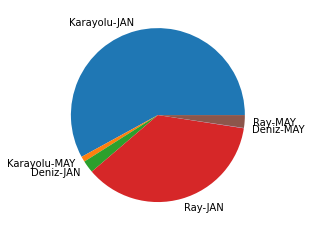

In [14]:
array1 = [total_usage_karayolu_a, total_usage_ray_b, total_usage_deniz_a, total_usage_ray_a, total_usage_deniz_b, total_usage_karayolu_b]
x = np.array(array1)
Raw1 = ["Karayolu-JAN", "Karayolu-MAY", "Deniz-JAN", "Ray-JAN", "Deniz-MAY", "Ray-MAY"]

plt.pie(x, labels = Raw1)
plt.show()


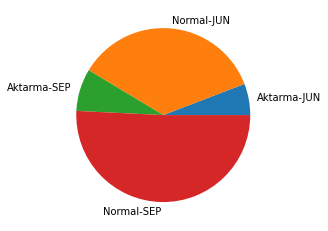

In [15]:
array2 = [total_usage_aktarma_Jun, total_usage_normal_Jun, total_usage_aktarma_Sep, total_usage_normal_Sep]
y = np.array(array2)
Raw2 = ["Aktarma-JUN", "Normal-JUN", "Aktarma-SEP", "Normal-SEP"]

plt.pie(y, labels = Raw2)
plt.show()

### Step 4

In [16]:
rawApr2020

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-04-10 16:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,667,704
1,2020-04-16 12:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,145,147
2,2020-04-17 14:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,816,831
3,2020-04-16 00:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,5,5
4,2020-04-28 12:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1452,1543
...,...,...,...,...,...,...,...,...
15509,2020-04-17 08:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,546,554
15510,2020-04-06 23:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,5,5
15511,2020-04-28 01:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,3,3
15512,2020-04-28 13:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,839,878


In [17]:
rawApr2020[['DATE', 'TIME']] = rawApr2020['DATE_TIME'].str.split(' ', expand=True)
rawApr2020_sorted = rawApr2020.sort_values('DATE')
rawApr2020_sorted

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,DATE,TIME
11535,2020-04-01 12:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,1927,2088,2020-04-01,12:00:00
821,2020-04-01 19:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,69,69,2020-04-01,19:00:00
4345,2020-04-01 11:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,312,326,2020-04-01,11:00:00
8800,2020-04-01 12:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,2426,2522,2020-04-01,12:00:00
11533,2020-04-01 16:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,883,917,2020-04-01,16:00:00
...,...,...,...,...,...,...,...,...,...,...
12926,2020-04-30 10:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,255,259,2020-04-30,10:00:00
7671,2020-04-30 22:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,2,2,2020-04-30,22:00:00
14696,2020-04-30 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,856,869,2020-04-30,06:00:00
12973,2020-04-30 08:00:00,2,RAY,MARMARAY,2,AKTARMA,727,728,2020-04-30,08:00:00


In [18]:
RAW = rawApr2020_sorted[["LINE", "NUMBER_OF_PASSAGE", "DATE"]] 
raw = pd.DataFrame(RAW)

In [19]:
date = np.unique(rawApr2020_sorted["DATE"])
line = np.unique(rawApr2020_sorted["LINE"])

In [ ]:
ARR = []
for i in range(len(date)):
    for j in range(len(line)):
            x = raw[(raw['LINE'] == line[j]) & (raw['DATE'] == date[i])].sum()
            result = x["NUMBER_OF_PASSAGE"]
            ARR.append(x["NUMBER_OF_PASSAGE"])
ARR

In [21]:
ARRAY = np.reshape(ARR,(30,20))

In [22]:
raw_date = pd.date_range('2020-04-01', periods = 30)
df_APR = pd.DataFrame(ARRAY ,
                  index = raw_date, columns = line)
df_APR

,AKSARAY-HAVALİMANI,EDİRNEKAPI-SULTANÇİFTLİĞİ,KABATAŞ-BAĞCILAR,KADIKÖY-KARTAL METROSU,KADIKÖY-MODA,KİRAZLI-OLİMPİYATKÖY,LEVENT - RUMELİ HİSARÜSTÜ,MARMARAY,METROBÜS,MOTOR TEKNE,TAKSİM-4.LEVENT,TAKSİM-KABATAŞ FUNİKULERİ,TELEFERİK EYÜP PİYERLOTİ,TELEFERİK MAÇKA - TAŞKIŞLA,ÖHO,ÜSKÜDAR ÇEKMEKÖY METROSU,İETT,İETT NOSTALJİK TRAMVAY,İETT TÜNEL,ŞEHİR HATLARI
2020-04-01,65045.0,36425.0,48956.0,24878.0,126.0,15065.0,1131.0,50955.0,123809.0,9991.0,40948.0,410.0,0.0,0.0,383918.0,25430.0,176087.0,28.0,584.0,8633.0
2020-04-02,59120.0,33140.0,44173.0,22683.0,120.0,14153.0,1140.0,46075.0,111006.0,8564.0,38273.0,386.0,0.0,0.0,357783.0,23013.0,162309.0,22.0,492.0,7645.0
2020-04-03,63413.0,35620.0,48289.0,23331.0,125.0,14230.0,1095.0,49149.0,119369.0,9452.0,39766.0,408.0,0.0,0.0,375060.0,24215.0,170042.0,23.0,637.0,9147.0
2020-04-04,44833.0,25173.0,32214.0,15338.0,43.0,9717.0,864.0,36263.0,85469.0,5648.0,25275.0,215.0,0.0,0.0,280050.0,16532.0,92322.0,18.0,294.0,5309.0
2020-04-05,27781.0,14595.0,18315.0,9010.0,22.0,3833.0,545.0,22624.0,51500.0,2642.0,15255.0,107.0,0.0,0.0,179469.0,9722.0,43009.0,16.0,149.0,2721.0
2020-04-06,55417.0,31951.0,46461.0,21099.0,0.0,13614.0,1015.0,51581.0,113485.0,7937.0,37137.0,0.0,0.0,0.0,356508.0,21664.0,162396.0,0.0,461.0,8404.0
2020-04-07,53569.0,31815.0,43259.0,19938.0,0.0,12882.0,972.0,49925.0,109784.0,8623.0,34134.0,0.0,1.0,0.0,351272.0,20586.0,157387.0,0.0,475.0,8190.0
2020-04-08,51731.0,30889.0,42596.0,19965.0,0.0,12780.0,1013.0,49913.0,109560.0,8483.0,33854.0,0.0,0.0,0.0,347948.0,20299.0,158524.0,0.0,496.0,8633.0
2020-04-09,52176.0,30787.0,42505.0,19782.0,0.0,12867.0,981.0,49076.0,109226.0,8679.0,33469.0,0.0,0.0,0.0,349456.0,20196.0,160317.0,0.0,517.0,9114.0
2020-04-10,53440.0,32154.0,45845.0,20483.0,0.0,13203.0,974.0,52167.0,118741.0,9427.0,35468.0,0.0,0.0,0.0,368043.0,20952.0,167820.0,0.0,585.0,10598.0


In [23]:
findmax = df_APR.idxmax("columns")
findmax

2020-04-01     ÖHO
2020-04-02     ÖHO
2020-04-03     ÖHO
2020-04-04     ÖHO
2020-04-05     ÖHO
2020-04-06     ÖHO
2020-04-07     ÖHO
2020-04-08     ÖHO
2020-04-09     ÖHO
2020-04-10     ÖHO
2020-04-11    İETT
2020-04-12    İETT
2020-04-13     ÖHO
2020-04-14     ÖHO
2020-04-15     ÖHO
2020-04-16     ÖHO
2020-04-17     ÖHO
2020-04-18    İETT
2020-04-19    İETT
2020-04-20     ÖHO
2020-04-21     ÖHO
2020-04-22     ÖHO
2020-04-23    İETT
2020-04-24    İETT
2020-04-25    İETT
2020-04-26    İETT
2020-04-27     ÖHO
2020-04-28     ÖHO
2020-04-29     ÖHO
2020-04-30     ÖHO
Freq: D, dtype: object

### Step 5

In [24]:
rawAug2020

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-08-31 20:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,1599,1606
1,2020-08-24 15:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,159,162
2,2020-08-27 11:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,87,88
3,2020-08-16 06:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,224,227
4,2020-08-29 07:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,25,25
...,...,...,...,...,...,...,...,...
22605,2020-08-10 13:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,4052,4360
22606,2020-08-18 15:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,4280,4586
22607,2020-08-15 09:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,3334,3436
22608,2020-08-28 07:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,3236,3320


In [25]:
rawAug2020[['DATE', 'TIME']] = rawAug2020['DATE_TIME'].str.split(' ', expand = True)
sorted_rawAug2020 = rawAug2020.sort_values(['DATE'])
sorted_rawAug2020.groupby("DATE")
sorted_rawAug2020

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,DATE,TIME
12237,2020-08-01 17:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,19028,20211,2020-08-01,17:00:00
12413,2020-08-01 19:00:00,1,KARAYOLU,İETT,2,AKTARMA,7138,7336,2020-08-01,19:00:00
9235,2020-08-01 05:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,170,214,2020-08-01,05:00:00
633,2020-08-01 13:00:00,2,RAY,İETT TÜNEL,2,NORMAL,209,255,2020-08-01,13:00:00
12433,2020-08-01 08:00:00,1,KARAYOLU,İETT,2,AKTARMA,2272,2372,2020-08-01,08:00:00
...,...,...,...,...,...,...,...,...,...,...
17530,2020-08-31 17:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,365,373,2020-08-31,17:00:00
3992,2020-08-31 04:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,19,19,2020-08-31,04:00:00
17531,2020-08-31 20:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,NORMAL,153,158,2020-08-31,20:00:00
4029,2020-08-31 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,101499,109219,2020-08-31,08:00:00


In [26]:
new_sorted_rawAug2020 = sorted_rawAug2020[['NUMBER_OF_PASSENGER', 'NUMBER_OF_PASSAGE', 'DATE']]
AUG2020 = pd.DataFrame(new_sorted_rawAug2020)
AUG2020

,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,DATE
12237,19028,20211,2020-08-01
12413,7138,7336,2020-08-01
9235,170,214,2020-08-01
633,209,255,2020-08-01
12433,2272,2372,2020-08-01
...,...,...,...
17530,365,373,2020-08-31
3992,19,19,2020-08-31
17531,153,158,2020-08-31
4029,101499,109219,2020-08-31


In [27]:
date_Aug = np.unique(AUG2020['DATE'])

In [28]:
arr_q15 = []
for i in range(len(date_Aug)):
            x = AUG2020[(AUG2020['DATE'] == date_Aug[i])].sum()
            passage = x["NUMBER_OF_PASSAGE"]
            passenger = x["NUMBER_OF_PASSENGER"]
            arr_q15.append(x["NUMBER_OF_PASSAGE"])
            arr_q15.append(x["NUMBER_OF_PASSENGER"])
            

In [29]:
array_q15 = np.reshape(arr_q15, (31, 2))
array_q15

array([[3864568, 3175625],
       [4051211, 3353801],
       [3902550, 3326812],
       [3645945, 3388301],
       [3743044, 3490563],
       [3742428, 3495338],
       [3770262, 3520707],
       [3240121, 2984185],
       [2558633, 2304881],
       [3998987, 3739536],
       [3983955, 3727450],
       [3963809, 3711349],
       [3913821, 3665751],
       [3956312, 3704884],
       [3451771, 3176187],
       [2728010, 2449474],
       [4075992, 3813937],
       [4030906, 3774340],
       [4013766, 3762787],
       [3833265, 3598172],
       [3964267, 3716955],
       [3507748, 3231423],
       [2674945, 2400991],
       [4138881, 3879249],
       [4131820, 3876156],
       [4099124, 3848699],
       [4094979, 3846006],
       [4126934, 3874685],
       [3475306, 3207372],
       [3432231, 3005758],
       [4181880, 3925466]], dtype=int64)

In [30]:
date_q15 = pd.date_range('2020-08-01', periods=31)
df_q15 = pd.DataFrame(array_q15, index = date_q15, columns = ['NUMBER_OF_PASSAGE', 'NUMBER_OF_PASSENGER'])
df_q15

,NUMBER_OF_PASSAGE,NUMBER_OF_PASSENGER
2020-08-01,3864568,3175625
2020-08-02,4051211,3353801
2020-08-03,3902550,3326812
2020-08-04,3645945,3388301
2020-08-05,3743044,3490563
2020-08-06,3742428,3495338
2020-08-07,3770262,3520707
2020-08-08,3240121,2984185
2020-08-09,2558633,2304881
2020-08-10,3998987,3739536


In [31]:
array_q15 = []
for j in range(len(date_Aug)):
            X = AUG2020[(AUG2020['DATE'] == date_Aug[j])].sum()
            passage_ratio = X["NUMBER_OF_PASSAGE"]
            passenger_ratio = X["NUMBER_OF_PASSENGER"]
            ratio = X["NUMBER_OF_PASSAGE"]/X["NUMBER_OF_PASSENGER"]
            array_q15.append(X["NUMBER_OF_PASSAGE"])
            array_q15.append(X["NUMBER_OF_PASSENGER"])
            array_q15.append(ratio)

In [32]:
q15 = np.reshape(array_q15, (31, 3))

In [33]:
Date_q15 = pd.date_range('2020-08-01', periods=31)
df_15 = pd.DataFrame(q15,
                  index = Date_q15, columns = ['NUMBER_OF_PASSAGE', 'NUMBER_OF_PASSENGER', 'RATIO'])
df_15

,NUMBER_OF_PASSAGE,NUMBER_OF_PASSENGER,RATIO
2020-08-01,3864568.0,3175625.0,1.216947
2020-08-02,4051211.0,3353801.0,1.207946
2020-08-03,3902550.0,3326812.0,1.173060
2020-08-04,3645945.0,3388301.0,1.076039
2020-08-05,3743044.0,3490563.0,1.072332
2020-08-06,3742428.0,3495338.0,1.070691
2020-08-07,3770262.0,3520707.0,1.070882
2020-08-08,3240121.0,2984185.0,1.085764
2020-08-09,2558633.0,2304881.0,1.110093
2020-08-10,3998987.0,3739536.0,1.069381


Since August has a ratio of more than 1 between the number of passenger and the number of passage for each day, we can say that the number of passage on each day of the month is more than the number of passenger.

# Question 2

For this question use the data at this [link](https://alaska.usgs.gov/products/data.php?dataid=522).This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

**Step 1:** Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.

**Step 2:** Can you statistically observe any differences in lengths between the years 2018 and 2019?

**Step 3:** Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.

**Step 4:** Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?

**Step 5:** Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

## Answers

In [34]:
with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as url:
    zipfile = ZipFile(BytesIO(url.read()))
    Q2 = pd.read_csv(zipfile.open('fish_stableIsotopes_beaufort_stanek.csv'),sep=',')
Q2

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN
0,ARCI005,Arctic Cisco,2018-08-11,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88
1,ARCI014,Arctic Cisco,2018-08-12,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16
2,ARCI021,Arctic Cisco,2017-08-06,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61
3,ARCI038,Arctic Cisco,2017-08-05,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90
4,ARCI040,Arctic Cisco,2017-08-09,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01
...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88
788,THST010,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98
789,THST011,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79
790,THST012,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02


In [35]:
Q2[['Year','Month','Day']] = Q2['Date'].str.split('-', expand=True)
Q2

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN,Year,Month,Day
0,ARCI005,Arctic Cisco,2018-08-11,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88,2018,08,11
1,ARCI014,Arctic Cisco,2018-08-12,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16,2018,08,12
2,ARCI021,Arctic Cisco,2017-08-06,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61,2017,08,06
3,ARCI038,Arctic Cisco,2017-08-05,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90,2017,08,05
4,ARCI040,Arctic Cisco,2017-08-09,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01,2017,08,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88,2019,07,22
788,THST010,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98,2019,07,22
789,THST011,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79,2019,07,28
790,THST012,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02,2019,07,28


In [36]:
grouped = Q2.groupby(Q2.Year)
Q2_2017 = grouped.get_group("2017")
Q2_2018 = grouped.get_group("2018")
Q2_2019 = grouped.get_group("2019")

In [37]:
location_2017 = Counter(Q2_2017['Location'])
location_2017

Counter({'Kaktovik Lagoon': 66, 'Jago Lagoon': 70})

In [38]:
location_2018 = Counter(Q2_2018['Location'])
location_2018

Counter({'Kaktovik Lagoon': 88,
         'Stefansson Sound': 122,
         'Simpson Lagoon': 82,
         'Jago Lagoon': 120})

In [39]:
location_2019 = Counter(Q2_2019['Location'])
location_2019

Counter({'Jago Lagoon': 55,
         'Stefansson Sound': 70,
         'Simpson Lagoon': 85,
         'Kaktovik Lagoon': 33})

### Step 1

In [40]:
q2_2017 = Q2_2017.groupby(by = ['Location']).mean().iloc[:,:1]
q2_2017

,mmLength
Location,
Jago Lagoon,265.485714
Kaktovik Lagoon,154.469697


In [41]:
q2_2018 = Q2_2018.groupby(by = ['Location']).mean().iloc[:,:1]
q2_2018

,mmLength
Location,
Jago Lagoon,275.125000
Kaktovik Lagoon,254.647727
Simpson Lagoon,202.634146
Stefansson Sound,220.860656


In [42]:
q2_2019 = Q2_2019.groupby(by = ['Location']).mean().iloc[:,:1]
q2_2019

,mmLength
Location,
Jago Lagoon,299.181818
Kaktovik Lagoon,274.212121
Simpson Lagoon,217.428571
Stefansson Sound,235.557143


### Step 2

In [43]:
T_test_Q22 = ttest_rel(q2_2018,q2_2019)
T_test_Q22

Ttest_relResult(statistic=array([-8.17336142]), pvalue=array([0.0038313]))

Yes. As a result of the t test, it can be observed that the length values between 2018 and 2019 are different, since the p value is very close to 0 and is a very small value. Also, the fact that the statistical value is negative does not affect the significance of the statistical difference between the two groups.

### Step 3

In [44]:
q2_2017_d13C = Q2_2017.groupby(by = ['Location']).mean().iloc[:,1:2]
q2_2017_d13C

,d13C
Location,
Jago Lagoon,-21.995000
Kaktovik Lagoon,-20.663636


In [45]:
q2_2018_d13C = Q2_2018.groupby(by = ['Location']).mean().iloc[:,1:2]
q2_2018_d13C

,d13C
Location,
Jago Lagoon,-21.835083
Kaktovik Lagoon,-20.745341
Simpson Lagoon,-22.200976
Stefansson Sound,-22.909836


In [46]:
q2_2019_d13C = Q2_2019.groupby(by = ['Location']).mean().iloc[:,1:2]
q2_2019_d13C

,d13C
Location,
Jago Lagoon,-21.864545
Kaktovik Lagoon,-20.207576
Simpson Lagoon,-21.727412
Stefansson Sound,-21.830429


In [47]:
q2_2017_d15N = Q2_2017.groupby(by = ['Location']).mean().iloc[:,2:3]
q2_2017_d15N

,d15N
Location,
Jago Lagoon,13.23600
Kaktovik Lagoon,13.16303


In [48]:
q2_2018_d15N = Q2_2018.groupby(by = ['Location']).mean().iloc[:,2:3]
q2_2018_d15N

,d15N
Location,
Jago Lagoon,13.830750
Kaktovik Lagoon,14.442500
Simpson Lagoon,13.133659
Stefansson Sound,12.842951


In [49]:
q2_2019_d15N = Q2_2019.groupby(by = ['Location']).mean().iloc[:,2:3]
q2_2019_d15N

,d15N
Location,
Jago Lagoon,12.440545
Kaktovik Lagoon,13.898485
Simpson Lagoon,13.078941
Stefansson Sound,13.308857


### Step 4

In [50]:
T_test_Q23 = ttest_rel(q2_2018_d13C,q2_2019_d13C)
T_test_Q23

Ttest_relResult(statistic=array([-2.27218168]), pvalue=array([0.10770819]))

Yes. Here, we cannot refuse the test, since the p-value is greater than alpha = 0.05. We don't have enough evidence to say that the data between the two groups differ. Also, the fact that the statistical value is negative does not affect the significance of the statistical difference between the two groups.

In [51]:
T_test_Q24 = ttest_rel(q2_2018_d15N,q2_2019_d15N)
T_test_Q24

Ttest_relResult(statistic=array([0.96485137]), pvalue=array([0.40579294]))

Here, since the p-value is less than alpha = 0.05, we can deny the test and claim that the data between the two groups differ.

### Step 5

No, we can't. Because the size of the values obtained in 2017 differs from those of 2018 and 2019, hypothesis testing cannot be applied. If the size of the values obtained from 2017 were the same as 2018 and 2019, we could make a comparison between them.